# Curvas I-V para circuitos RC - Proyecto Experimental

Daniel Dorado Toro

Elaborado: 23-09-2022


En este notebook produzco las gráficas de algunos de los datos tomados hasta el momento. Hasta ahora, he tomado datos para 4 resistencias (5.1 kOhms, 470 kOhms, 680 kOhms, 1 MOhms) y 25 capacitancias diferentes (entre 1pF y 100nF). El número de puntos fue de 100, el compliance se fijó en 0.1 y el voltaje se varió entre -1V y +1V.

Para futuras tomas de datos reduciré el número de capacitancias a 10, puesto que hay valores que dan resultados muy similares. Incluyo aquí algunas de las gráficas que ilustran el comportamiento general de las curvas.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
RC_data = {}

for root, dirs, files in os.walk('./Datos'):
    for name in files:
        if '.txt' in name:
            R = name[name.find('R')+len('R'):name.rfind('_C')]
            C = name[name.find('C')+len('C'):name.rfind('.')]
            RC_data[(R,C)] = pd.read_csv('./Datos/'+name, delimiter='\t', 
                                         names=['Voltage (V)', 'Current (A)', 'Resistance (Ohms)'])

### Zig-zag en las curvas para bajas capacitancias.

Para capacitancias por debajo de los 600 pF, las curvas solo hacen un zig-zag en valores de baja corriente, como se aprecia en la gráfica de abajo. Tengo la hipótesis de que esto se debe al nivel de compliance. Como las bajas capacitancias producen una impedancia baja, la corriente es más grande para estas capacitancias bajas y seguramente supera el valor determinado de compliance. No he querido modificar este valor, puesto que no sé hasta qué punto es seguro hacerlo.

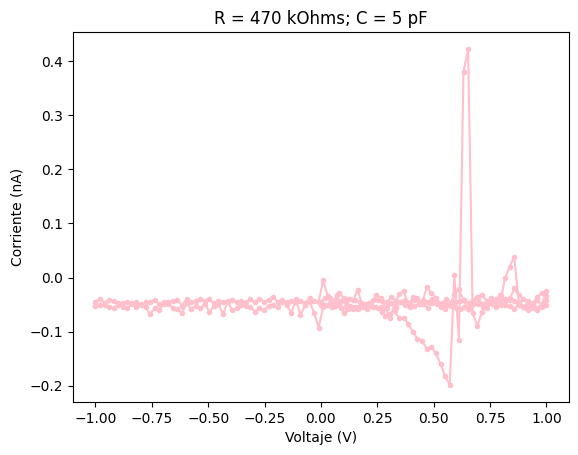

In [3]:
data = RC_data[('470kOhms', '5pF')]

plt.plot(data['Voltage (V)'], data['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, )
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('R = 470 kOhms; C = 5 pF')

plt.show()

### Variando el valor de la capacitancia

Las curvas presentan el comportamiento histerético esperado. Las curvas se hacen más altas a medida que disminuye la capacitancia. Esto tiene sentido, pues la impedancia es menor para capacitancias menores.

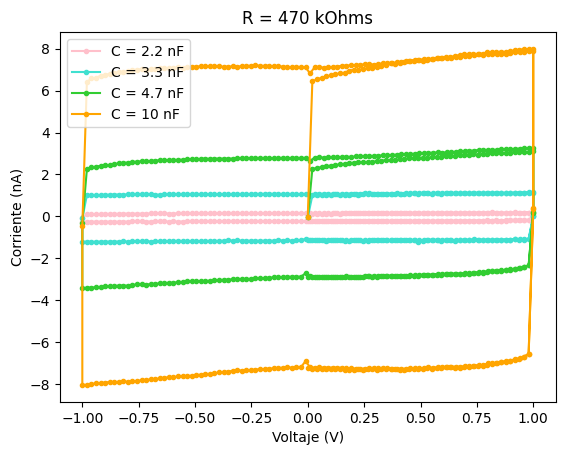

In [4]:
data1 = RC_data[('470kOhms', '2,2nF')]
data2 = RC_data[('470kOhms', '3,3nF')]
data3 = RC_data[('470kOhms', '4,7nF')]
data4 = RC_data[('470kOhms', '10nF')]

plt.plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, label = 'C = 2.2 nF')
plt.plot(data2['Voltage (V)'], data2['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3, label = 'C = 3.3 nF')
plt.plot(data3['Voltage (V)'], data3['Current (A)']*1e+9, color = 'limegreen', marker='o', ms=3, label = 'C = 4.7 nF')
plt.plot(data4['Voltage (V)'], data4['Current (A)']*1e+9, color = 'orange', marker='o', ms=3, label = 'C = 10 nF')
plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('R = 470 kOhms')
plt.legend()

plt.show()

La forma es muy similar para distintos valores de la capacitancia.

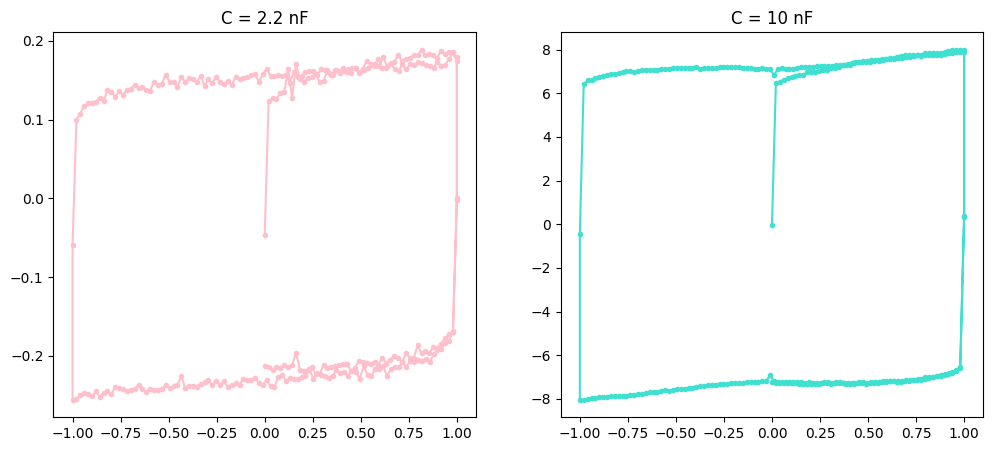

In [5]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

ax[0].plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3)
ax[0].set_title('C = 2.2 nF')

ax[1].plot(data4['Voltage (V)'], data4['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3)
ax[1].set_title('C = 10 nF')

plt.show()

### Variando la resistencia

En este caso, también al disminuir la resistencia aumenta la corriente. La forma sigue conservandose para distintas resistencias. 

Comentario: Los datos para la resistencia de 5,1 kOhms fueron tomados por error con un número de puntos inferior al de las demás resistencias. Es necesario repetir la toma de estos datos con el número de puntos correcto.

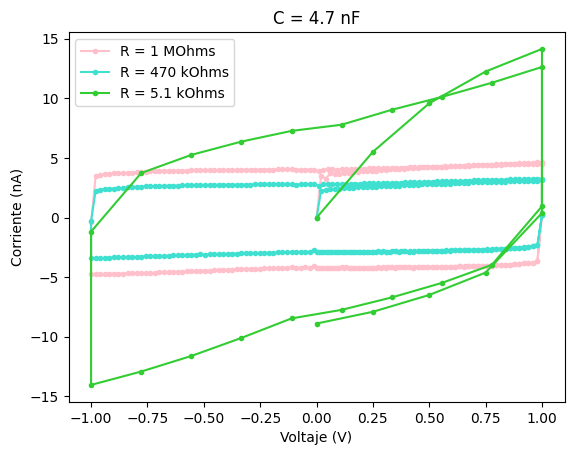

In [6]:
data1 = RC_data[('1MOhms', '4,7nF')]
data2 = RC_data[('470kOhms', '4,7nF')]
data3 = RC_data[('5,1kOhms', '4,7nF')]

plt.plot(data1['Voltage (V)'], data1['Current (A)']*1e+9, color = 'pink', marker='o', ms=3, label = 'R = 1 MOhms')
plt.plot(data2['Voltage (V)'], data2['Current (A)']*1e+9, color = 'turquoise', marker='o', ms=3, label = 'R = 470 kOhms')
plt.plot(data3['Voltage (V)'], data3['Current (A)']*1e+9, color = 'limegreen', marker='o', ms=3, label = 'R = 5.1 kOhms')


plt.xlabel('Voltaje (V)')
plt.ylabel('Corriente (nA)')
plt.title('C = 4.7 nF')
plt.legend()

plt.show()